## Restaurants Exploaratory Data Analysis

### 1. Load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import random
import pytz
from datetime import datetime
from pytz import timezone
import pytz

In [3]:
full_data = pd.read_csv('../data/full_data.csv',parse_dates =["Date"])
full_data.head()

,OrderId,UserId,RestaurantId,Date,Rating,Comments,Address,Count,ItemId,Price,ViewCount,Name,Description,SearchVector,Type
0,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
1,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
2,293,4,121,2020-05-13 01:20:59.267256,NaN,NaN,NaN,1,440,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main
3,294,3,121,2020-05-13 17:34:35.519326,NaN,NaN,NaN,1,455,1.5,9.0,Regular Coffee,NaN,'coffe':2 'regular':1,Drink
4,297,142,121,2020-05-14 00:08:48.756423,NaN,NaN,NaN,1,540,9.9,485.0,Kashk Bademjan,"Barbequed eggplant, lentils, fried onions, gar...",'bademjan':2 'bbq':8 'egg':10 'eggplant':6 'ga...,Main


In [4]:
full_data['Cost'] = full_data['Count'] * full_data ['Price']
full_data['Month'] = full_data['Date'].dt.month_name()
full_data['Day'] = full_data['Date'].dt.day_name()
full_data['Hour'] = (full_data['Date'].dt.hour - 8)

In [5]:
# After converting UTC to Pacific time, fix the negative hours
full_data['Hour'] = full_data['Hour'].apply(lambda x : x + 24 if x < 0 else x)
full_data.head()

,OrderId,UserId,RestaurantId,Date,Rating,Comments,Address,Count,ItemId,Price,ViewCount,Name,Description,SearchVector,Type,Cost,Month,Day,Hour
0,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main,15.0,March,Saturday,0
1,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main,27.0,March,Saturday,0
2,293,4,121,2020-05-13 01:20:59.267256,NaN,NaN,NaN,1,440,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main,14.0,May,Wednesday,17
3,294,3,121,2020-05-13 17:34:35.519326,NaN,NaN,NaN,1,455,1.5,9.0,Regular Coffee,NaN,'coffe':2 'regular':1,Drink,1.5,May,Wednesday,9
4,297,142,121,2020-05-14 00:08:48.756423,NaN,NaN,NaN,1,540,9.9,485.0,Kashk Bademjan,"Barbequed eggplant, lentils, fried onions, gar...",'bademjan':2 'bbq':8 'egg':10 'eggplant':6 'ga...,Main,9.9,May,Thursday,16


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24109 entries, 0 to 24108
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       24109 non-null  int64         
 1   UserId        24109 non-null  int64         
 2   RestaurantId  24109 non-null  int64         
 3   Date          24109 non-null  datetime64[ns]
 4   Rating        1757 non-null   float64       
 5   Comments      355 non-null    object        
 6   Address       409 non-null    object        
 7   Count         24109 non-null  int64         
 8   ItemId        24109 non-null  int64         
 9   Price         20972 non-null  float64       
 10  ViewCount     24109 non-null  float64       
 11  Name          24109 non-null  object        
 12  Description   14025 non-null  object        
 13  SearchVector  24109 non-null  object        
 14  Type          24109 non-null  object        
 15  Cost          20972 non-null  float6

### 2. Overal sales analysis for all the restaurants

In [7]:
full_data.RestaurantId.value_counts()

1029    16451
121      3281
1034     2600
299      1748
1048       17
1040        9
110         3
Name: RestaurantId, dtype: int64

In [8]:
# lets keep just the restauarnts that have enough orders.
filter = (full_data.RestaurantId == 121) | (full_data.RestaurantId == 299) | (full_data.RestaurantId == 1029) | (full_data.RestaurantId == 1034)
full_data = full_data[filter]

In [9]:
# replace the restaurant Id just for convinient 
full_data.RestaurantId.replace({121 : 'A' ,299 : 'B',1029 : 'C',1034 : 'D'}, inplace= True)

In [10]:
# keep the restauarnts information and set the date as the index
data = full_data[['RestaurantId','Date','Count','Cost','Month','Day','Hour']]
# data.index = pd.CategoricalIndex(data.index, 
#                                categories=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'], 
#                                ordered=True)

# data.set_index("Date", inplace = True)


In [11]:
data.head()

,RestaurantId,Date,Count,Cost,Month,Day,Hour
2,A,2020-05-13 01:20:59.267256,1,14.0,May,Wednesday,17
3,A,2020-05-13 17:34:35.519326,1,1.5,May,Wednesday,9
4,A,2020-05-14 00:08:48.756423,1,9.9,May,Thursday,16
5,A,2020-05-14 00:08:48.756423,1,12.0,May,Thursday,16
6,A,2020-05-14 00:46:28.274449,1,15.0,May,Thursday,16


#### 2.1 Compare the yearly sales valumes of all the restaurants

Text(0.5, 0, 'Restaurant Name')

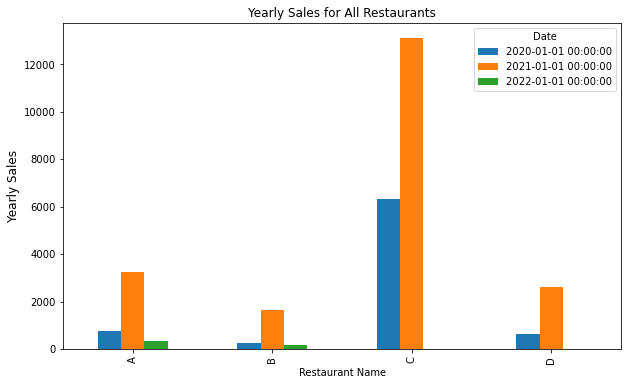

In [12]:
data_year = data.copy()
data_year['Date'] = data_year['Date'].values.astype('<M8[Y]')

fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylabel("Yearly Sales", fontsize = 12)
ax.set_title("Yearly Sales for All Restaurants", fontsize = 12)
yearly_sales = data_year.groupby(['RestaurantId','Date'])['Count'].sum().unstack()
yearly_sales.plot(kind ='bar', ax=ax)
ax.set_xlabel("Restaurant Name") 

As seen above Retauarnt C has the highest yearly sales for 2020 ans 2021.

#### 2.2 Compare the monthly sales valumes of all the restaurants

/var/folders/pm/804wbvdx4lz30mqcr3mys38r0000gn/T/ipykernel_58762/1817534635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].values.astype('<M8[M]')


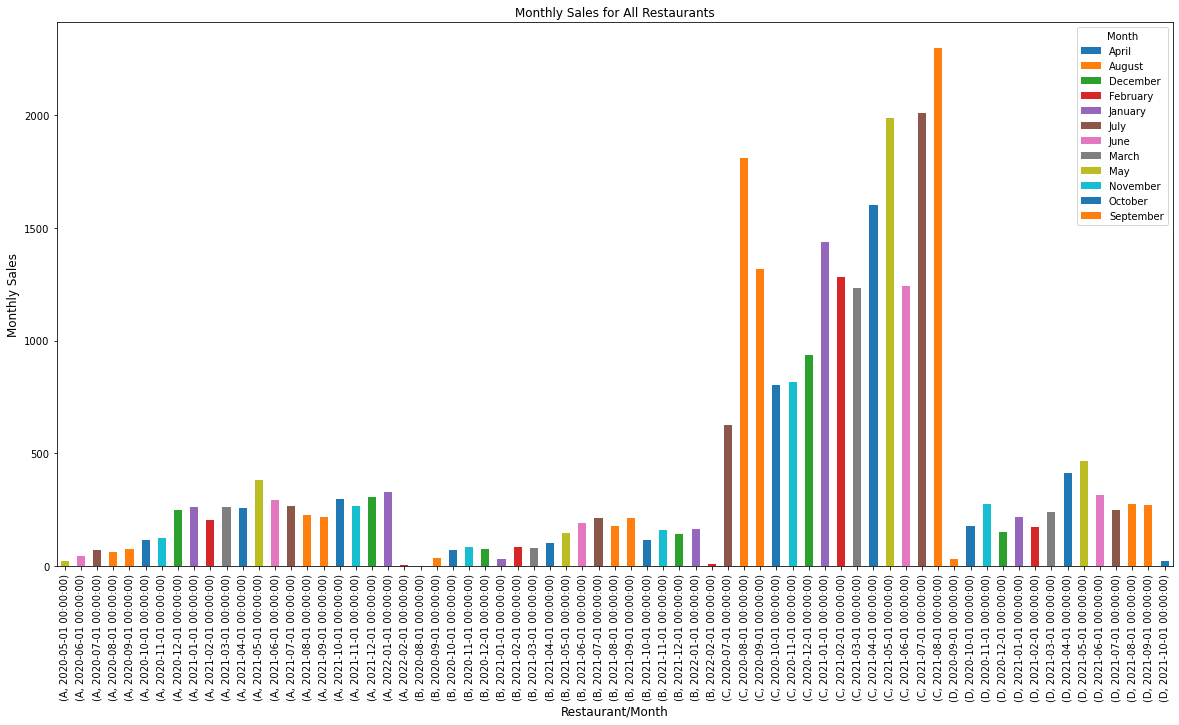

In [19]:
data['Date'] = data['Date'].values.astype('<M8[M]')

monthly_grouped = data.groupby(['RestaurantId','Date','Month']).sum()['Count'].unstack()

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel("Monthly Sales", fontsize = 12)
ax.set_title("Monthly Sales for All Restaurants", fontsize = 12)
monthly_grouped.plot(kind ='bar',ax=ax,stacked=True) 
ax.set_xlabel("Restaurant/Month", fontsize = 12)

In [14]:
# monthly_grouped = data.groupby(['RestaurantId','Month']).resample('M').sum()['Count'].unstack()

# fig, ax = plt.subplots(figsize=(20,10))
# ax.set_ylabel("Monthly Sales", fontsize = 12)
# ax.set_title("Monthly Sales for All Restaurants", fontsize = 12)
# monthly_grouped.plot(kind ='bar',ax=ax,stacked=True) 

# #Q? I would like to order them monthly, but I could not?

Text(0.5, 0, 'Restaurant')

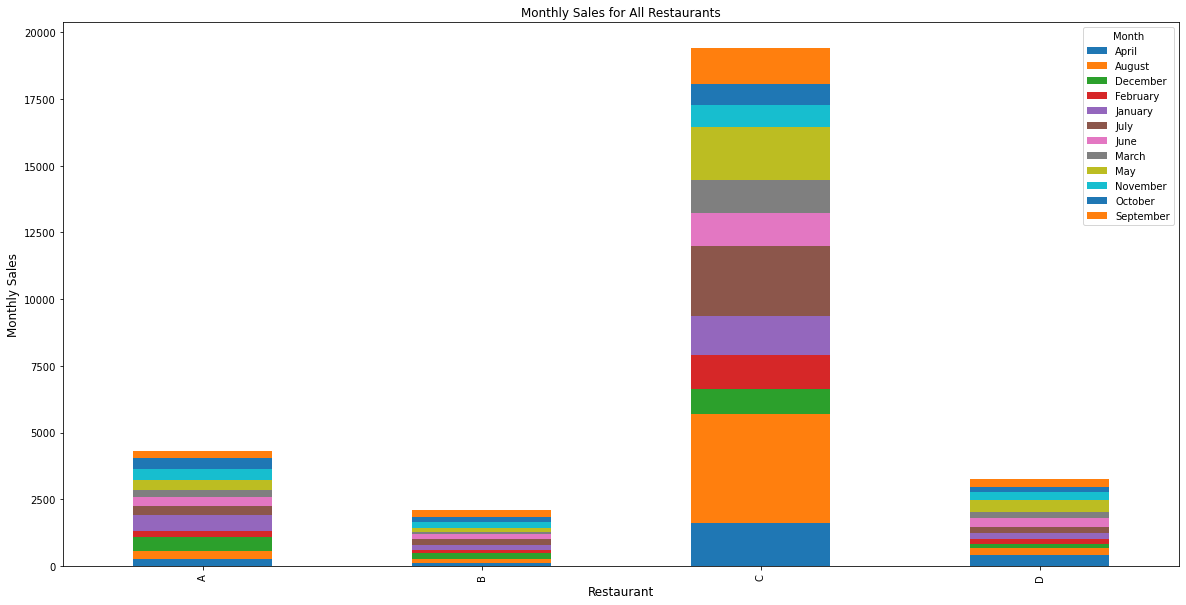

In [15]:
monthly_grouped = data.groupby(['RestaurantId','Month'])['Count'].sum().unstack()

fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylabel("Monthly Sales", fontsize = 12)
ax.set_title("Monthly Sales for All Restaurants", fontsize = 12)
monthly_grouped.plot(kind ='bar',ax=ax,stacked=True) 
ax.set_xlabel("Restaurant", fontsize = 12)

As expected restauarnts C has the highest monthly sales. Specially Auguest was the highest sales for this restaurant.

### 3. Sales analysis for each restaurants

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24080 entries, 2 to 24108
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RestaurantId  24080 non-null  object        
 1   Date          24080 non-null  datetime64[ns]
 2   Count         24080 non-null  int64         
 3   Cost          20943 non-null  float64       
 4   Month         24080 non-null  object        
 5   Day           24080 non-null  object        
 6   Hour          24080 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.5+ MB


In [17]:
# rename the restaurants just for convinience 
res_1 = data[data.RestaurantId == "A"]
res_2 = data[data.RestaurantId == "B"]
res_3 = data[data.RestaurantId == "C"]
res_4 = data[data.RestaurantId == "D"]

res_list = [res_1,res_2,res_3,res_4]

Now we will plot some graphs as below orders:
1. Monthly Week Day Sales
2. Week Days Sales
3. Monthly Percentage Sales
4. Daily Sales
5. Hourly Sales 


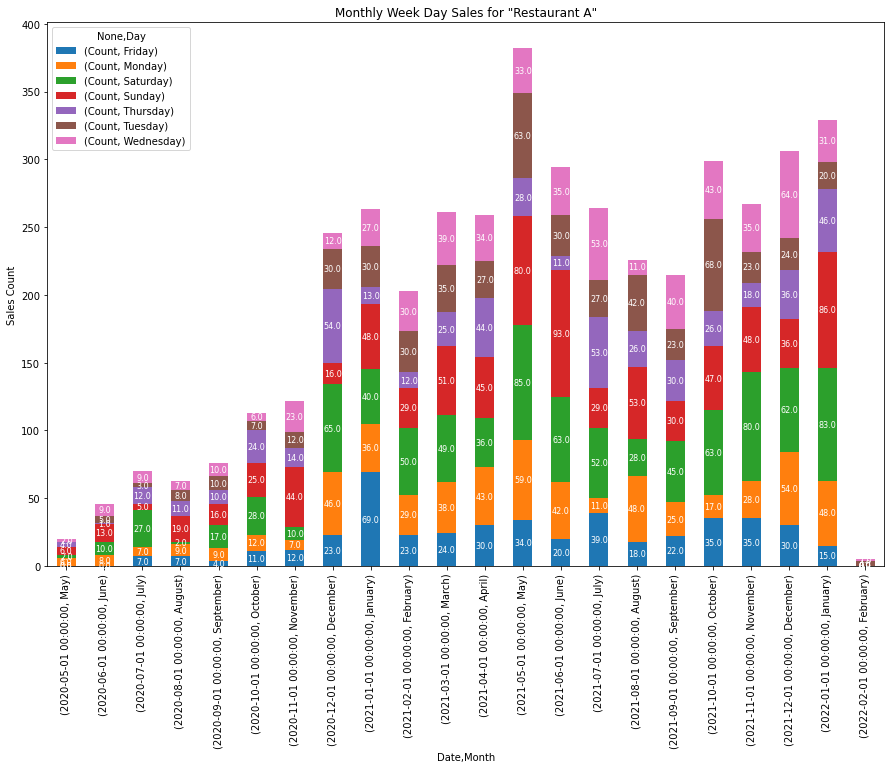

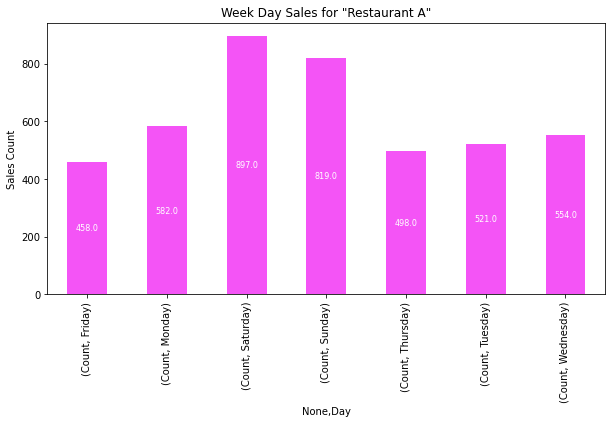

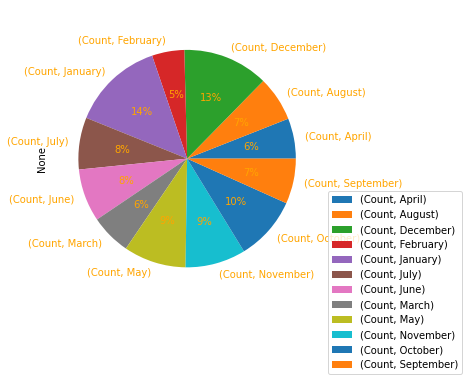

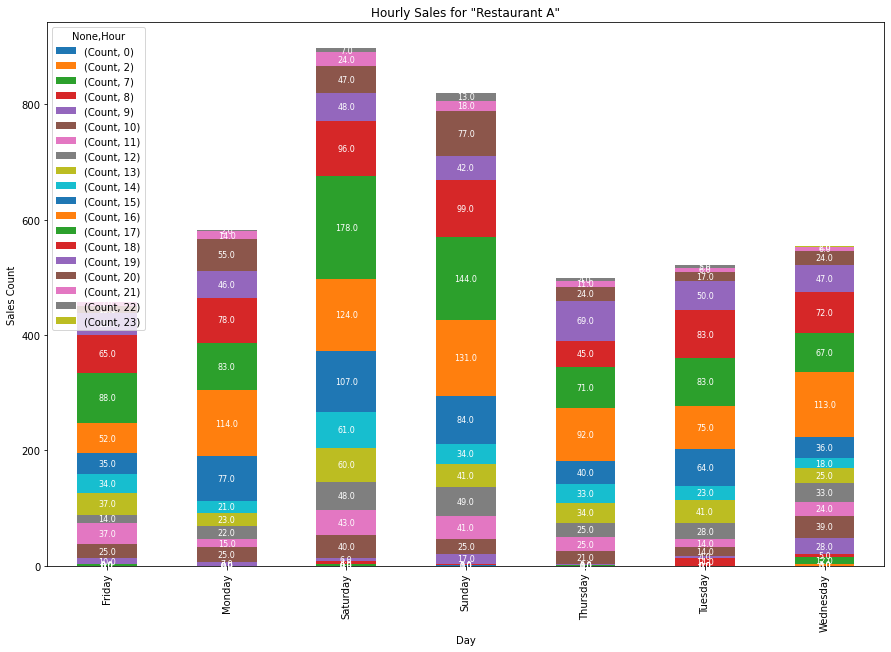

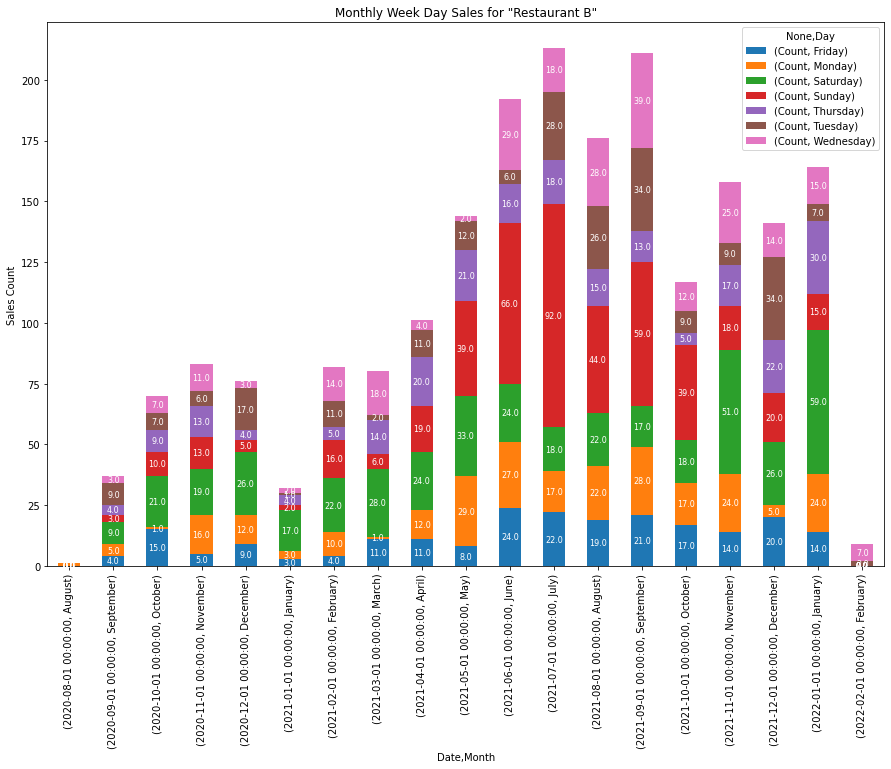

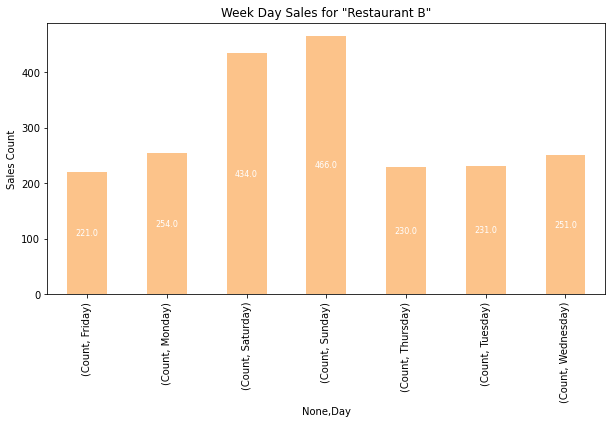

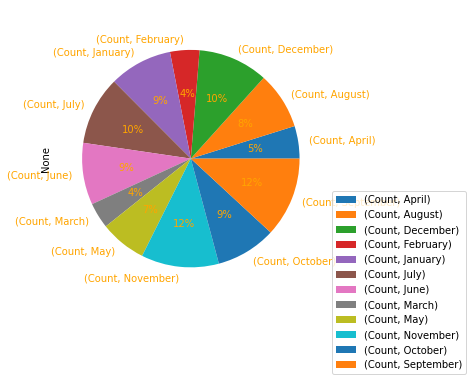

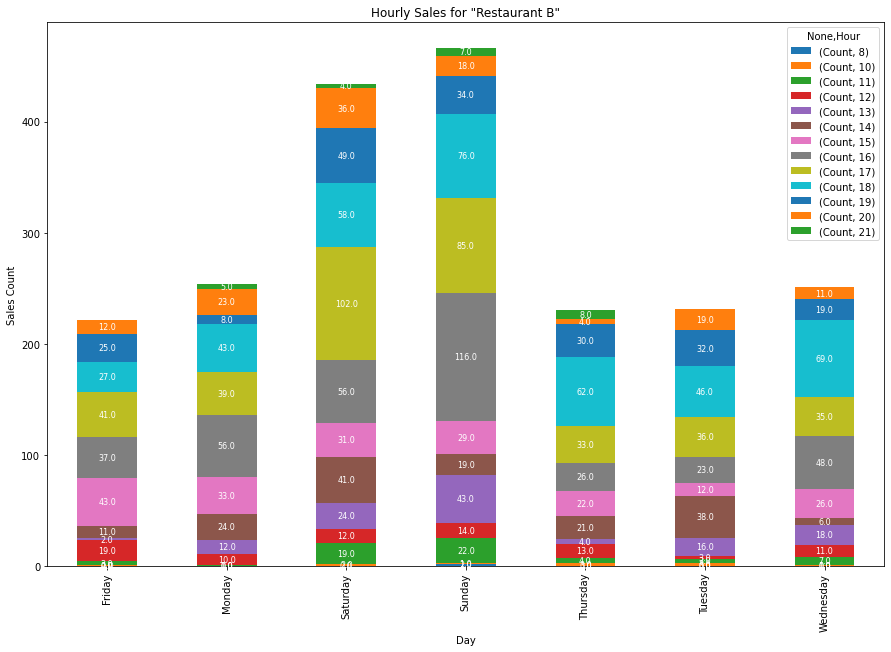

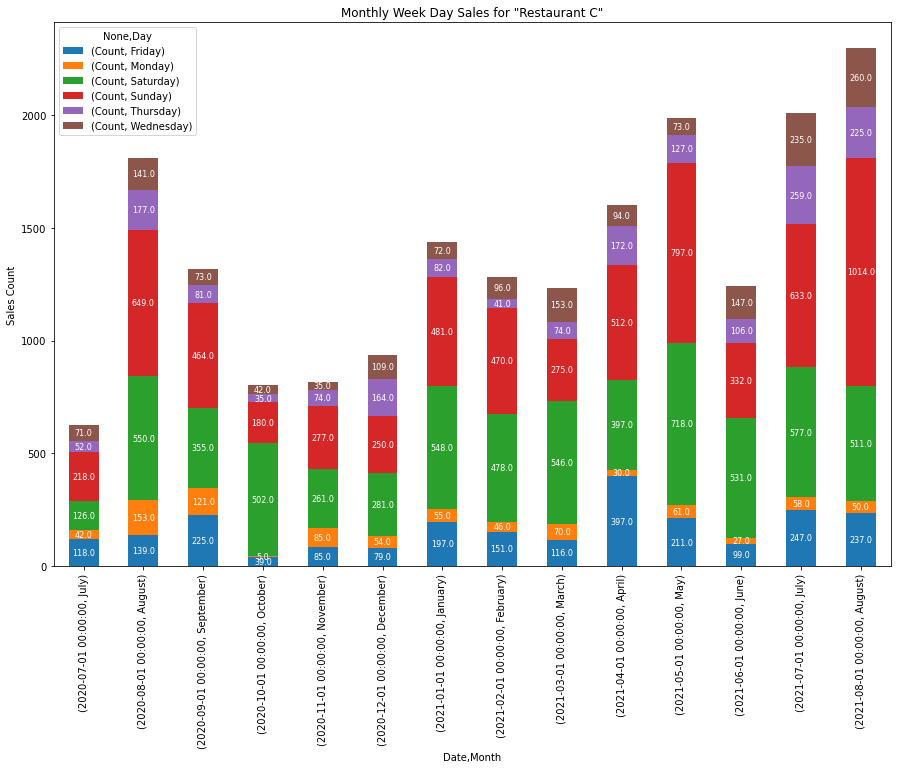

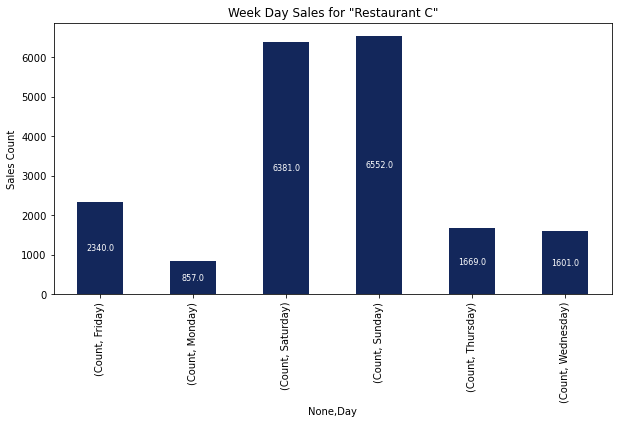

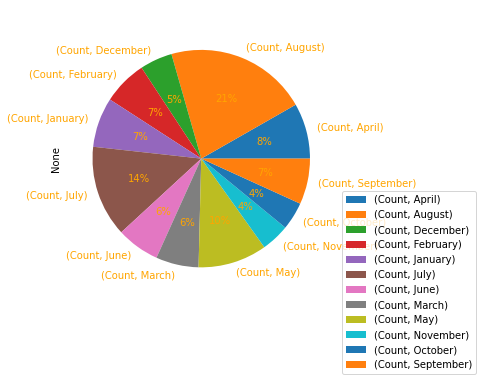

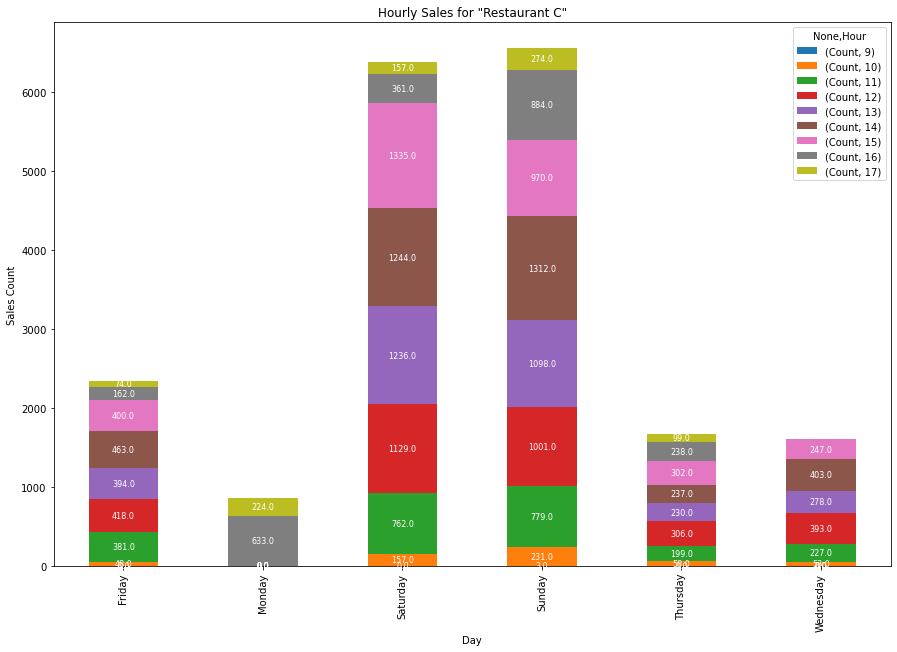

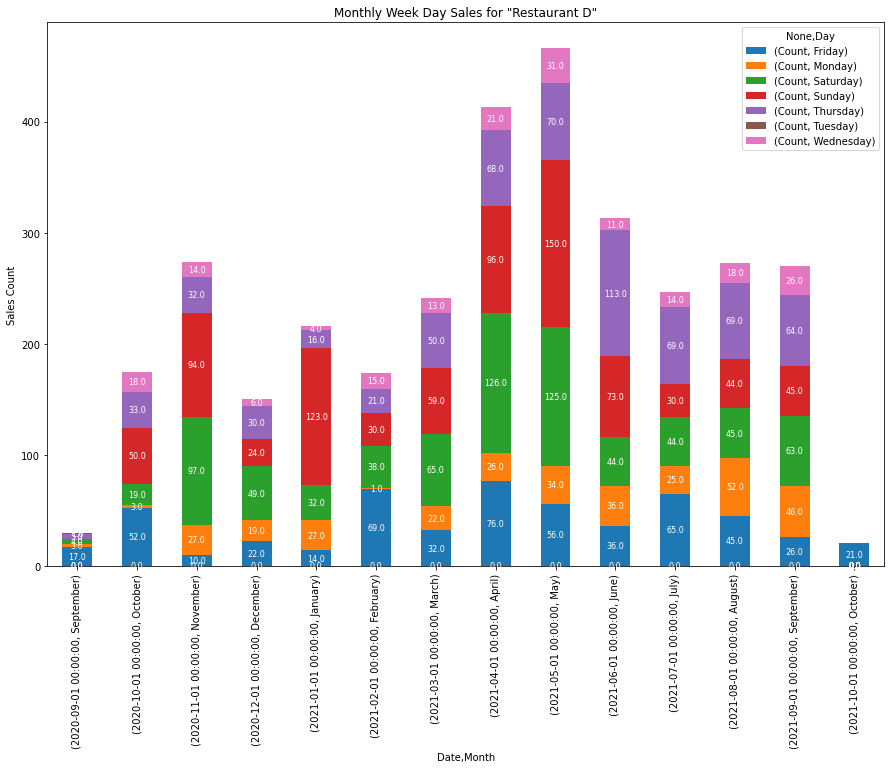

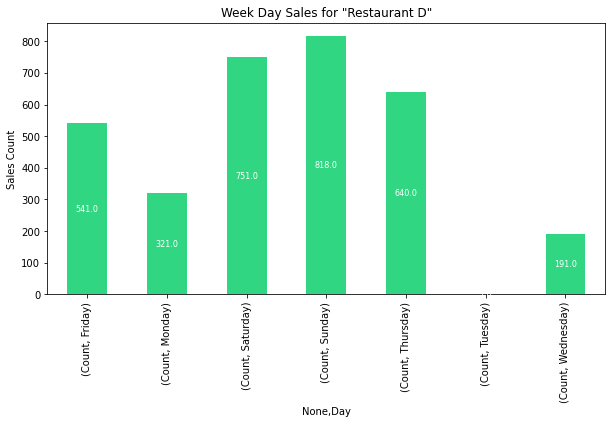

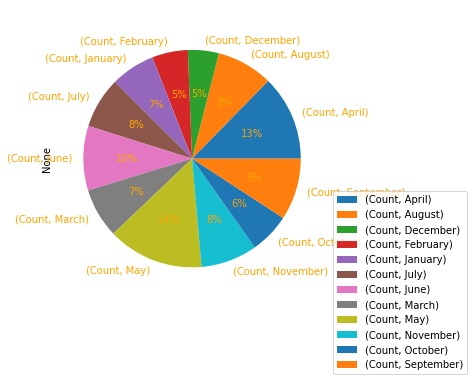

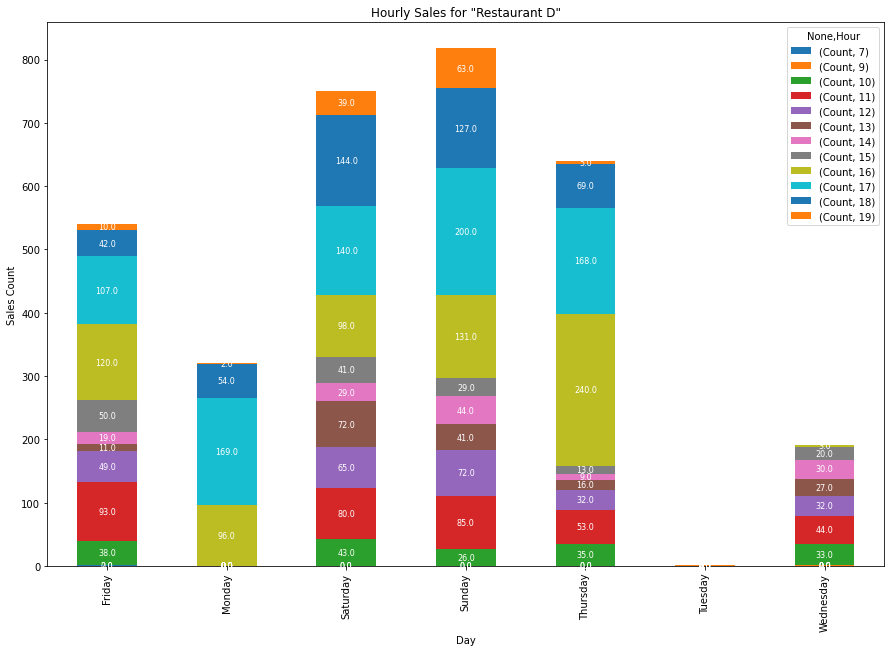

In [22]:

rest_name = ['A','B','C','D']

for i in range(len(res_list)):

    rgb = (random.random(), random.random(), random.random())
    weekday_sales_res = res_list[i].groupby(['Date','Month','Day'])[['Count']].sum()
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_ylabel('Sales Count')
    ax.set_title('Monthly Week Day Sales for \"Restaurant ' + rest_name[i] + "\"")
    weekday_sales_res.unstack().plot(kind ='bar',ax=ax,stacked=True)
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize = 8, color = 'w')

    daily_sales_res = res_list[i].groupby(['Day'])[['Count']].sum()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_ylabel('Sales Count')
    ax.set_title('Week Day Sales for \"Restaurant ' + rest_name[i] + "\"")
    daily_sales_res.unstack().plot(kind ='bar',ax=ax,stacked=True, color = [rgb])
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize = 8 , color = 'w')    

    
    monthly_sales_res = res_list[i].groupby('Month')[['Count']].sum()
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_ylabel('Sales Count')
    ax.set_title('Monthly Percentage Sales for \"Restaurant ' + rest_name[i] + "\"", color ='w')
    monthly_sales_res.unstack().plot(kind ='pie',ax=ax ,autopct='%1.0f%%',textprops=dict(color="orange"))
    plt.legend(loc="upper left",bbox_to_anchor=(1,0.4))

   
  
    hourly_sales_res = res_list[i].groupby(['Day','Hour'])[['Count']].sum()
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_ylabel('Sales Count')
    ax.set_title('Hourly Sales for \"Restaurant ' + rest_name[i] + "\"")
    hourly_sales_res.unstack().plot(kind ='bar',ax=ax,stacked=True)
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize = 8 , color = 'w')

